In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor  
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr, spearmanr


In [62]:
#ds=load_diabetes(as_frame=True)['frame']

In [68]:
data = load_diabetes()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

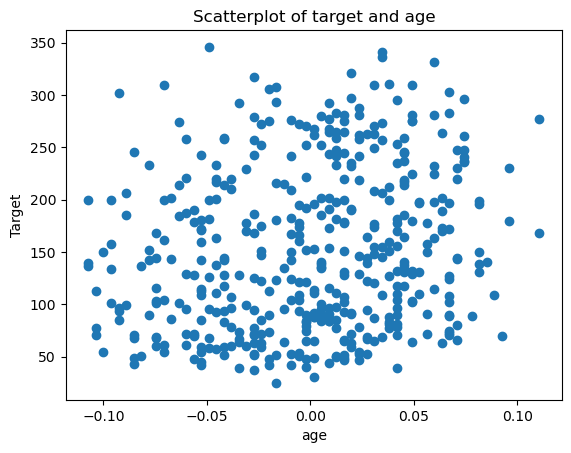

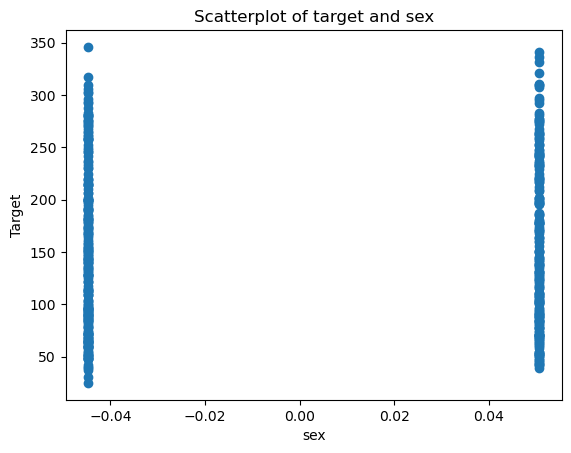

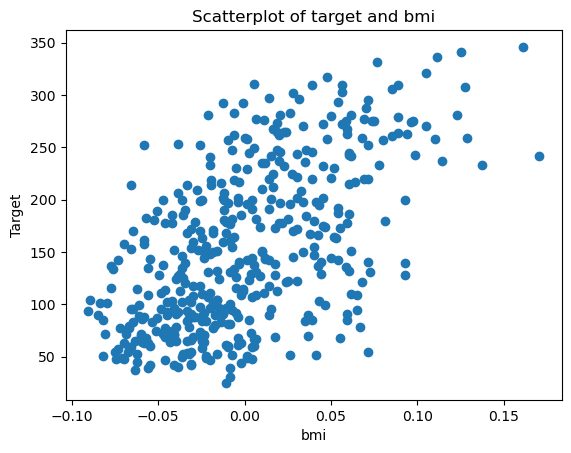

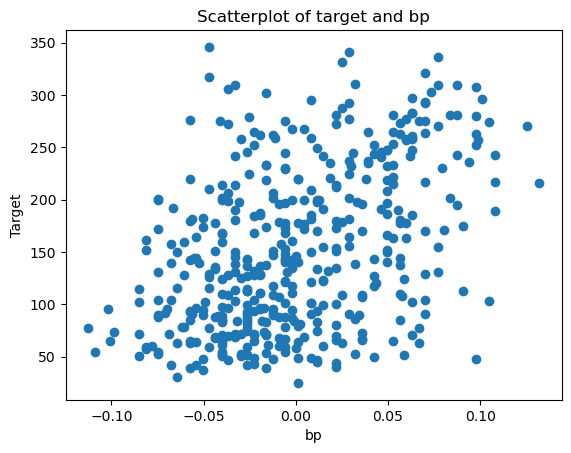

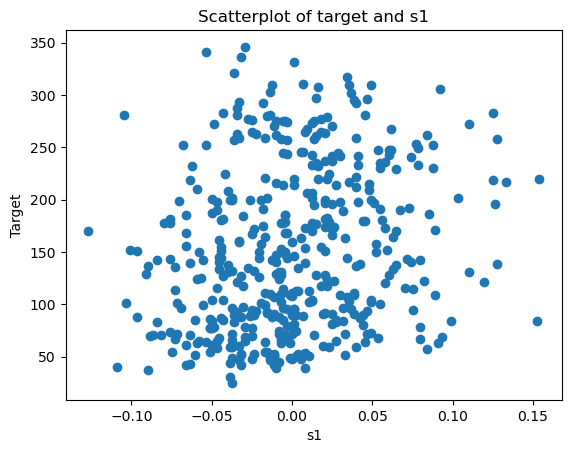

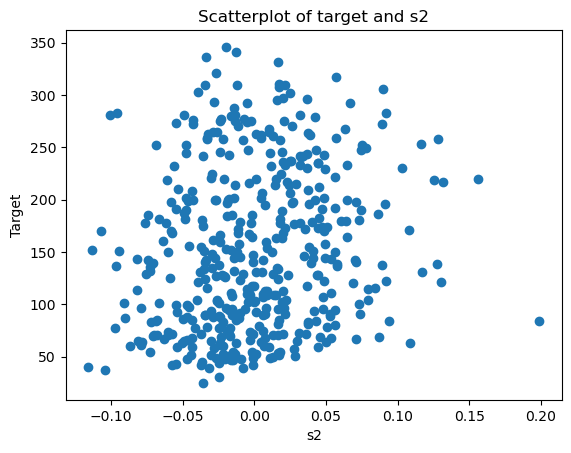

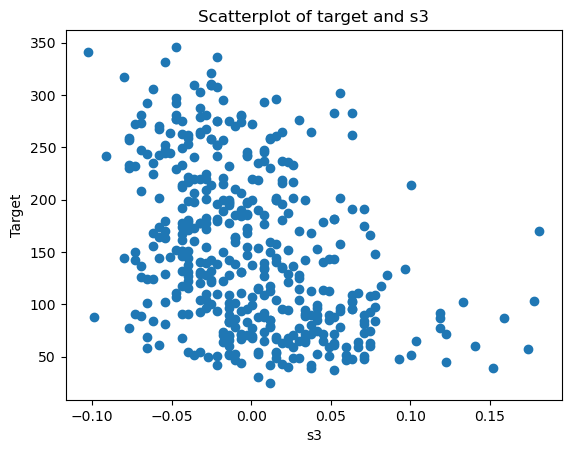

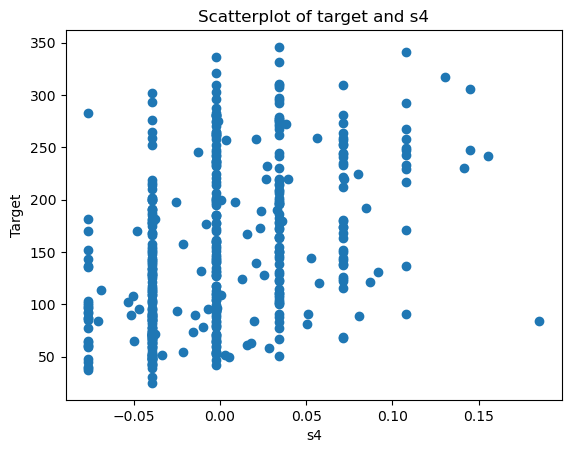

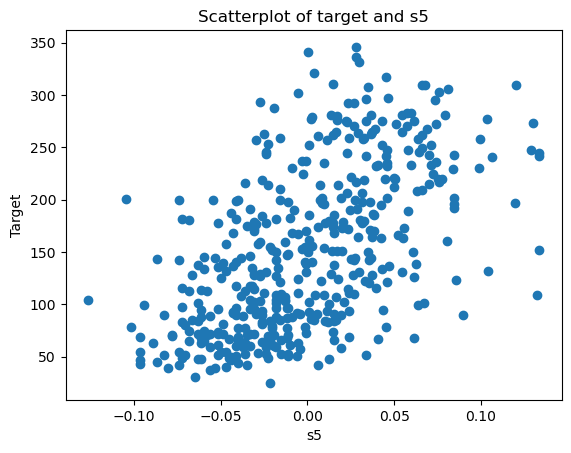

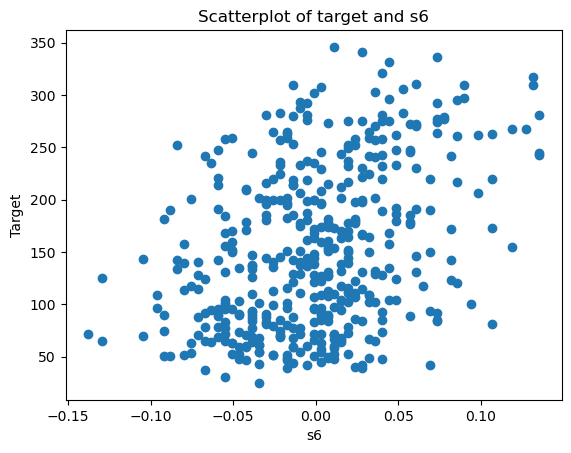

In [69]:
for feature in df:
  plt.scatter(df[feature], y)
  plt.title('Scatterplot of target and '+feature)
  plt.xlabel(feature)
  plt.ylabel('Target')
  plt.show()

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [84]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)
#VIF explain the connection between 1 variable  with others. With VIF we can  check for multiclinearity problems
# VIF > 10 too high and should be deleted,
# VIF = 5 is valid,
# VIF < 5  is good value

age      1.216284
sex      1.269207
bmi      1.498559
bp       1.447358
s2       1.180838
s3       1.473827
s5       1.641090
s6       1.476913
const    1.000000
dtype: float64

In [73]:
df.drop(columns=['s1'], inplace=True)

In [74]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

age    1.216892
sex    1.275049
bmi    1.502320
bp     1.457413
s2     2.926535
s3     3.736890
s4     7.818670
s5     2.172865
s6     1.484410
dtype: float64

In [75]:
df.drop(columns=['s4'], inplace=True)

In [76]:
pd.Series([variance_inflation_factor(df.values, i) 
               for i in range(df.shape[1])], 
              index=df.columns)

age    1.216284
sex    1.269207
bmi    1.498559
bp     1.447358
s2     1.180838
s3     1.473827
s5     1.641090
s6     1.476913
dtype: float64

In [81]:
df['const']=1

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.7, random_state=55)

In [88]:
reg = sm.OLS(y_train, X_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     37.67
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.78e-41
Time:                        15:04:00   Log-Likelihood:                -1672.2
No. Observations:                 309   AIC:                             3362.
Df Residuals:                     300   BIC:                             3396.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            8.3596     72.645      0.115      0.9

In [ ]:
df = df.drop(columns=['age','s6'])

In [94]:
y_hat_train = reg.predict(X_train)

In [95]:
y_hat_train

270    194.716661
151    143.384187
278    112.477599
441     39.886876
236    184.163132
          ...    
311    174.284677
29     189.865812
381     70.816512
295    156.461020
154    154.025149
Length: 309, dtype: float64

In [97]:
residuals = y_train-y_hat_train
residuals

270      7.283339
151    -55.384187
278    -10.477599
441     17.113124
236   -117.163132
          ...    
311      5.715323
29      93.134188
381     33.183488
295    -71.461020
154     42.974851
Length: 309, dtype: float64

In [ ]:
plt.hist(residuals )
plt.show()

In [120]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
trainL = model.score(X_train, y_train)
print("TrainLINEAR:", trainL)
testL = model.score(X_test, y_test)
print("TestLINEAR:", testL)

TrainLINEAR: 0.5010997732695888
TestLINEAR: 0.5314613981552974


In [121]:
#GRADIENTBOOSTINGREGRESSOR

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
train = model.score(X_train, y_train)
print("Train:", train)
test = model.score(X_test, y_test)
print("Test:", test)

Train: 0.8516504523237998
Test: 0.41458282436794613
